In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Load data

In [27]:
df = pd.read_csv("data_original_v2.csv")
df_ai = pd.read_csv("AI_repos.csv")
df_non_ai = pd.read_csv("nonAI_repos.csv")


In [41]:
df['releases_count'] = df['releases'].apply(len)
df_ai['releases_count'] = df_ai['releases'].apply(len)
df_non_ai['releases_count'] = df_non_ai['releases'].apply(len)
print("Original: ", df.columns, len(df))
print("AI: ", df_ai.columns, len(df_ai))
print("NonAI: ", df_non_ai.columns, len(df_non_ai))

Original:  Index(['url', 'name', 'owner', 'forks', 'stars', 'languages', 'commits',
       'creation_date', 'contributors', 'topics', 'watchers', 'readme',
       'releases', 'pull_requests', 'readme_size', 'commits_freq',
       'releases_freq', 'lines_of_codes', 'popularity_score_1',
       'popularity_score_2', 'popularity_score_3', 'releases_count'],
      dtype='object') 185873
AI:  Index(['url', 'name', 'owner', 'forks', 'stars', 'languages', 'commits',
       'creation_date', 'contributors', 'topics', 'watchers', 'readme',
       'releases', 'pull_requests', 'readme_size', 'commits_freq',
       'releases_freq', 'lines_of_codes', 'popularity_score_1',
       'popularity_score_2', 'popularity_score_3', 'releases_count'],
      dtype='object') 6545
NonAI:  Index(['url', 'name', 'owner', 'forks', 'stars', 'languages', 'commits',
       'creation_date', 'contributors', 'topics', 'watchers', 'readme',
       'releases', 'pull_requests', 'readme_size', 'commits_freq',
       'releases

### functions from prepare_data.py

In [29]:
def convert_columns_to_float32(df, columns):
    for col in columns:
        df[col] = df[col].astype('float32')
    return df

def prepare_data(input_columns, target_column, df_cleaned):
    df_cleaned = convert_columns_to_float32(df_cleaned, input_columns+[target_column])

    # Extract the input and target data
    X = df_cleaned[input_columns]
    y = df_cleaned[target_column]

    # Split the data into training and testing sets with a fixed random state
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Normalize using only training set statistics
    dtypes = list(zip(X.dtypes.index, map(str, X.dtypes)))
    for k, dtype in dtypes:
        if dtype == "float32":
            mean = X_train[k].mean()
            std = X_train[k].std()

            # Apply normalization
            X_train.loc[:, k] = (X_train[k] - mean) / std
            X_test.loc[:, k] = (X_test[k] - mean) / std

    # print("X_train: {}".format(X_train.shape))
    # print("y_train: {}".format(y_train.shape))
    # print("X_test: {}".format(X_test.shape))
    # print("y_test: {}".format(y_test.shape))

    return X_train, X_test, y_train, y_test, dtypes

### Train Linear Regression model

In [30]:
def linear_regression(features, target, df):
    # get train and test data
    X_train, X_test, y_train, y_test, dtypes = prepare_data(features, target, df)

    # train linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # print score
    print(f"R² score: {model.score(X_test, y_test)}")

    # get coefficients
    feature_coef = pd.DataFrame({'feature': features, 'coefficient': model.coef_})
    feature_coef = feature_coef.sort_values(by='coefficient')

    # create plot
    plt.figure(figsize=(10, 5))
    bars = plt.barh(feature_coef['feature'], feature_coef['coefficient'], color='skyblue')

    # add coef value
    # for bar in bars:
    #     plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
    #             bar.get_width(), va='center', ha='left', fontsize=10)

    plt.xlabel("Feature Importance (Coefficient)")
    plt.ylabel("Features")
    plt.title("Feature Importance in Linear Regression (" + target + ")" )
    plt.show()

    print(feature_coef[::-1])

### stars as target

#### Original

R² score: 0.6718846725613177


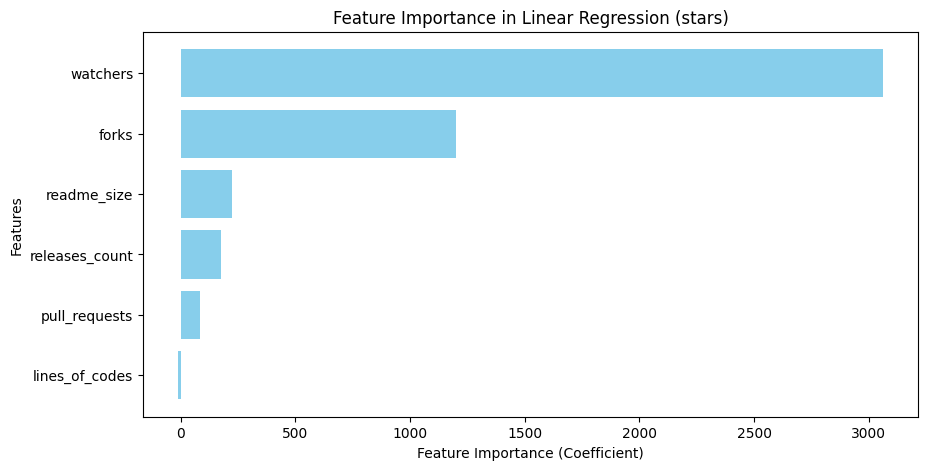

          feature  coefficient
1        watchers  3061.595215
0           forks  1198.306396
4     readme_size   224.256439
2  releases_count   176.257202
3   pull_requests    83.369995
5  lines_of_codes   -10.710413


In [43]:
features = ['forks', 'watchers', 'releases_count', 'pull_requests', 'readme_size', 'lines_of_codes']
linear_regression(features, 'stars', df)

#### AI

R² score: 0.49383605035048783


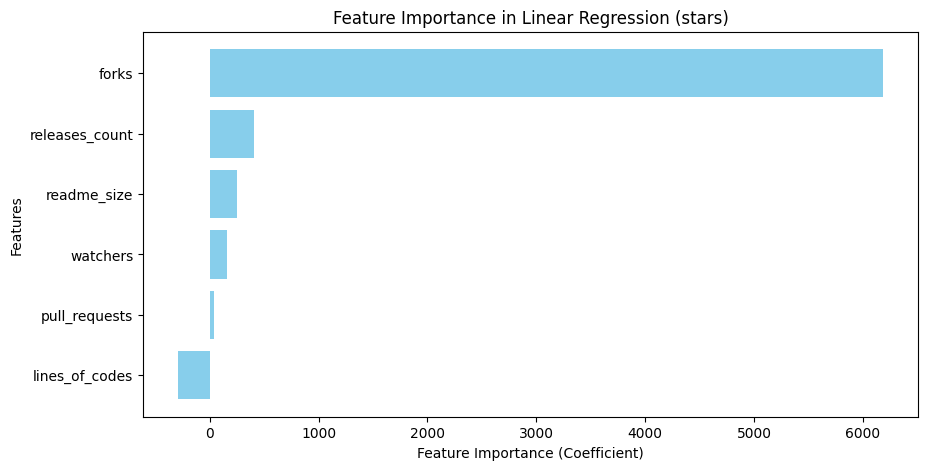

          feature  coefficient
0           forks  6183.439941
2  releases_count   405.475189
4     readme_size   251.239044
1        watchers   154.687912
3   pull_requests    38.609329
5  lines_of_codes  -287.276428


In [44]:
features = ['forks', 'watchers', 'releases_count', 'pull_requests', 'readme_size', 'lines_of_codes']
linear_regression(features, 'stars', df_ai)

#### NonAI

R² score: 0.4651785452747015


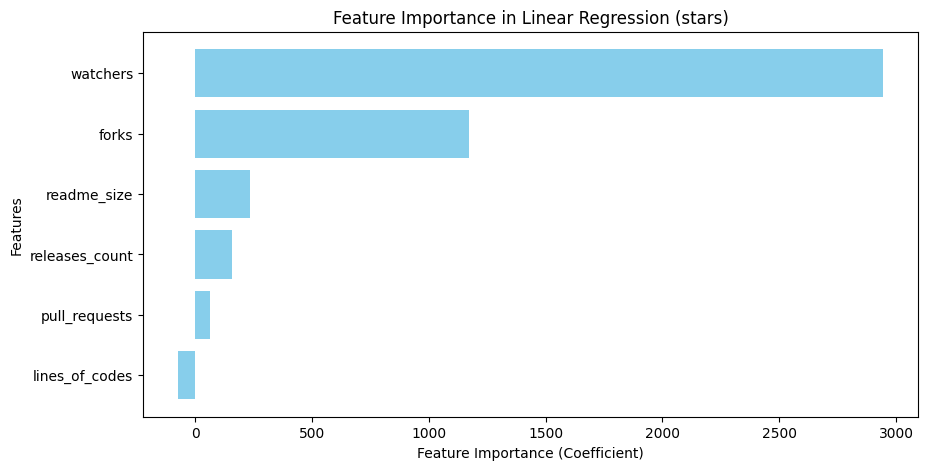

          feature  coefficient
1        watchers  2944.224854
0           forks  1170.493530
4     readme_size   234.819778
2  releases_count   159.116837
3   pull_requests    64.788452
5  lines_of_codes   -71.893501


In [45]:
features = ['forks', 'watchers', 'releases_count', 'pull_requests', 'readme_size', 'lines_of_codes']
linear_regression(features, 'stars', df_non_ai)

### popularity_score_3 (star + fork) as target

#### Original

R² score: 0.6341673719831873


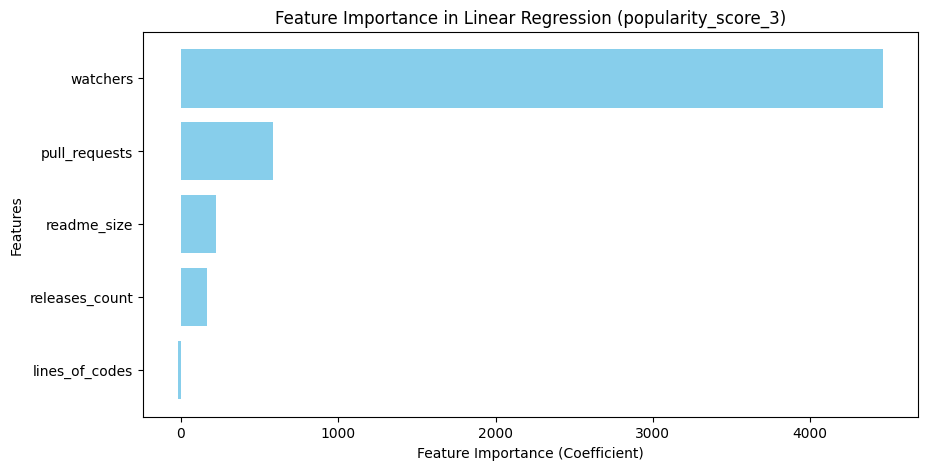

          feature  coefficient
0        watchers  4462.603516
2   pull_requests   582.500671
3     readme_size   224.566605
1  releases_count   168.308899
4  lines_of_codes   -15.830462


In [46]:
features = ['watchers', 'releases_count', 'pull_requests', 'readme_size', 'lines_of_codes']
linear_regression(features, 'popularity_score_3', df)

#### AI

R² score: 0.814910038251136


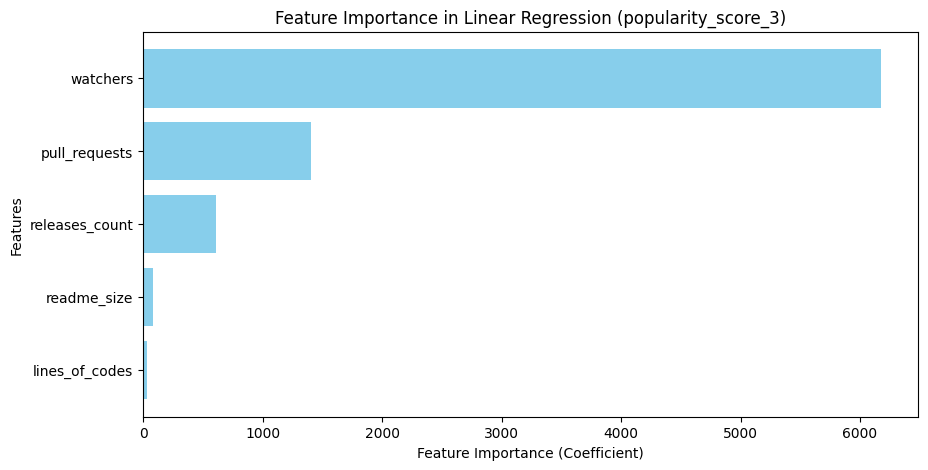

          feature  coefficient
0        watchers  6177.377930
2   pull_requests  1408.566162
1  releases_count   606.035645
3     readme_size    78.515869
4  lines_of_codes    31.294067


In [ ]:
features = ['watchers', 'releases_count', 'pull_requests', 'readme_size', 'lines_of_codes']
linear_regression(features, 'popularity_score_3', df_ai)

#### NonAI

R² score: 0.4274541290588585


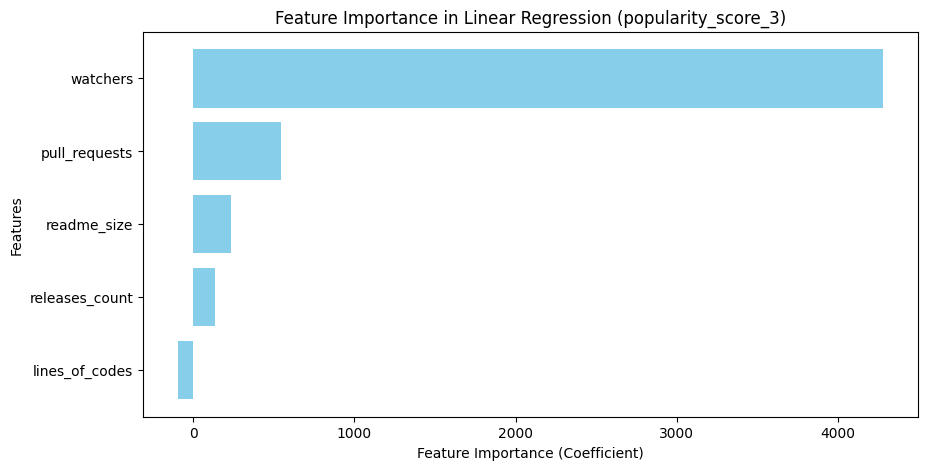

          feature  coefficient
0        watchers  4277.956055
2   pull_requests   545.467285
3     readme_size   235.612320
1  releases_count   137.525574
4  lines_of_codes   -91.575729


In [ ]:
features = ['watchers', 'releases_count', 'pull_requests', 'readme_size', 'lines_of_codes']
linear_regression(features, 'popularity_score_3', df_non_ai)